# Part C - Which Club has the Best Staff  

**The best staff always help their players grow, can you identify that using historical data?**

Study player data from Division 1 European League* players from the last 5 Years. Analyze changes in player stats and value. Rank the clubs according to best increase in statistics of a player

Graphically represent the scores for the test set

**Details:** 

- Sofifa Id, URL, Wage, Salary, Name, Real face, URL variables cannot be used during the prediction or learning. 

- Assign a score to all clubs out of 100, and represent it in an appropriate visualization. With 100 being the highest 

- For the test set, your model will be scored using MSE against the average of all models of the class. (Score = MSE( Your Values , Average of all models values))

- The test set is as follows for this problem statement (Division 1 European League):

**Leagues to be considered**

 **Premier League - English Premier League **

# Web Scrapper

In [1]:
# Import necessary libraries
from bs4 import BeautifulSoup as bs
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

**We scraped the required data from `https://www.espn.in` using the package BeautifulSoup and created new csv files for each year with just the clubs belonging to the English Premier League**

In [2]:
# save year-wise team names in a dictionary
year_teams = {}
for year in range(2015, 2020):
    teams = []
    # get the webpage
    r = requests.get(f'https://www.espn.in/football/table/_/league/ENG.1/season/{year}')
    # convert to a beautiful soup object
    soup = bs(r.content)
    # find the required table that contains the team names
    table = soup.find(class_="Table__TBODY")
    # find all the table rows: each row will have one team name
    table_rows = table.find_all('tr')
    # loop through the table rows and extract the team name
    for row in table_rows:
        # find the anchor tags that contains a main single team name
        anchors = row.find_all('a')
        for i, anch in enumerate(anchors):
            if i == 2:
                # get the team name
                name = anch.get_text()
                # append team name to the list
                teams.append(name)
    # add the team list to a dictionary as a value and a year as a key
    year_teams[year] = teams

In [3]:
# teams participated in English Premier League 2015
year_teams[2015]

['Leicester City',
 'Arsenal',
 'Tottenham Hotspur',
 'Manchester City',
 'Manchester United',
 'Southampton',
 'West Ham United',
 'Liverpool',
 'Stoke City',
 'Chelsea',
 'Everton',
 'Swansea City',
 'Watford',
 'West Bromwich Albion',
 'Crystal Palace',
 'AFC Bournemouth',
 'Sunderland',
 'Newcastle United',
 'Norwich City',
 'Aston Villa']

## Create five csv files:
- year_2015: contains all data for clubs that participated in EPL 2015
- year_2016: contains all data for clubs that participated in EPL 2016
- year_2017: contains all data for clubs that participated in EPL 2017
- year_2018: contains all data for clubs that participated in EPL 2018
- year_2019: contains all data for clubs that participated in EPL 2019

In [4]:
# loop through a dictionary created above
for year, teams in year_teams.items():
    # define a list
    team_list = []
    # loop through each team in teams
    for team in teams:
        # load the appropriate dataset: for teams participated in 2015 -> load players_2015 dataset and so on.
        df_fifa = pd.read_csv(f'data/players_{str(year)[2:]}.csv')
        # assign the team data to a new dataframe
        df = df_fifa[df_fifa['club'] == team]
        # add df to the list
        team_list.append(df)
    # concatenate all the dataframe 
    fifa_df = pd.concat(team_list)
    # save the dataframe as csv file
    fifa_df.to_csv(f'data/year_{year}.csv', index=False)

# Analysis

In [5]:
# load all the data from the csv file we created and saved above
fifa_15 = pd.read_csv('data/year_2015.csv')
fifa_16 = pd.read_csv('data/year_2016.csv')
fifa_17 = pd.read_csv('data/year_2017.csv')
fifa_18 = pd.read_csv('data/year_2018.csv')
fifa_19 = pd.read_csv('data/year_2019.csv')

**We choose the variable 'Overall' as the main feature in order to study the performance of the club. With increase in 'Overall', we say that the club's performance has also increased.**

In [6]:
# Computing the average 'overall' of all the players in each club:

avg_15 = fifa_15.groupby('club')['overall'].mean()
avg_15_df = pd.DataFrame(avg_15.values, index=avg_15.index, columns=['overall_15']).reset_index()

avg_16 = fifa_16.groupby('club')['overall'].mean()
avg_16_df = pd.DataFrame(avg_16.values, index=avg_16.index, columns=['overall_16']).reset_index()

avg_17 = fifa_17.groupby('club')['overall'].mean()
avg_17_df = pd.DataFrame(avg_17.values, index=avg_17.index, columns=['overall_17']).reset_index()

avg_18 = fifa_18.groupby('club')['overall'].mean()
avg_18_df = pd.DataFrame(avg_18.values, index=avg_18.index, columns=['overall_18']).reset_index()

avg_19 = fifa_19.groupby('club')['overall'].mean()
avg_19_df = pd.DataFrame(avg_19.values, index=avg_19.index, columns=['overall_19']).reset_index()

# Merge all the data into a new dataframe
merge_df = [avg_16_df, avg_17_df, avg_18_df, avg_19_df] 
new_df = avg_15_df.copy()
for df in merge_df:
    new_df = new_df.merge(df, on='club', how='outer')
# print the head of new dataframe
new_df.head()

,club,overall_15,overall_16,overall_17,overall_18,overall_19
0,Arsenal,74.181818,74.437500,76.151515,75.757576,74.787879
1,Aston Villa,69.468750,NaN,NaN,NaN,68.800000
2,Chelsea,73.272727,76.321429,75.545455,76.515152,76.787879
3,Crystal Palace,69.424242,72.827586,71.272727,70.575758,71.121212
4,Everton,72.363636,74.357143,73.545455,74.727273,73.939394


**We can see from the above table that the clubs in the league are not consistent over the past 5 years. Therefore, we decided to drop clubs that didn't contribute to the 5-year statistic.**

# Scoring Method-1 (Average Increase)

In [7]:
# drop the clubs that are not consistent over the five years (2015-19)
new_df_drop = new_df.dropna()
new_df_drop

,club,overall_15,overall_16,overall_17,overall_18,overall_19
0,Arsenal,74.181818,74.437500,76.151515,75.757576,74.787879
2,Chelsea,73.272727,76.321429,75.545455,76.515152,76.787879
3,Crystal Palace,69.424242,72.827586,71.272727,70.575758,71.121212
4,Everton,72.363636,74.357143,73.545455,74.727273,73.939394
5,Leicester City,66.454545,69.387097,71.515152,72.181818,73.969697
6,Liverpool,73.060606,76.111111,74.727273,75.909091,76.000000
7,Manchester City,73.424242,77.206897,75.545455,74.121212,76.848485
8,Manchester United,73.393939,76.259259,77.906250,77.666667,77.454545
11,Southampton,68.909091,72.064516,71.939394,71.878788,71.424242
15,Tottenham Hotspur,73.484848,72.733333,73.030303,73.515152,75.969697


**We now see if there how the clubs have performed in terms of their average "Overall" in these past 5 years**

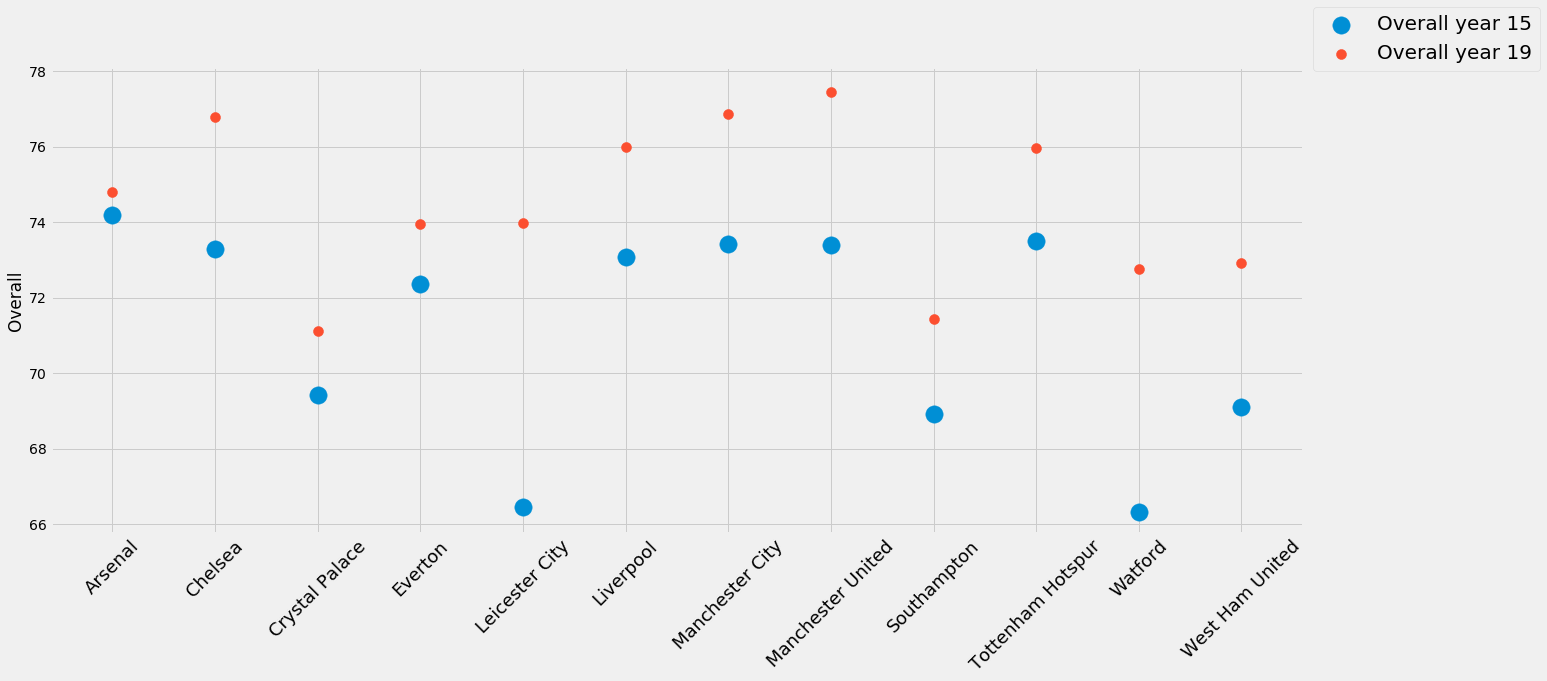

In [8]:
# create xticks for side-by-side bar plot. 
xticks1 = np.arange(12)
xticks2 = xticks1+0.4

plt.style.use('fivethirtyeight')
# plot
plt.figure(figsize=(20, 8))
plt.scatter(xticks1,new_df_drop['overall_15'], label="Overall year 15", s=300)
plt.scatter( xticks1,new_df_drop['overall_19'], label="Overall year 19", s=100)
plt.xticks(xticks1, new_df_drop['club'], fontsize=18, rotation=45)
plt.ylabel("Overall")
plt.legend(fontsize=20, loc='upper left', bbox_to_anchor=(1, 1.15))
plt.show()

**It's good to see that all clubs have done well in the last 5 years. What is also interesting to note is that the English Premier League has a range of clubs with varied performance, with just four clubs lagging behind the rest, in terms of 'overall' in the year 2019.**

In [9]:
def cal_mean(team1, team2):
    #Computing the mean difference for a given club between two succesive years
    yearA = team1['overall']
    yearB = team2['overall']
    return (yearB.mean() - yearA.mean())

In [10]:
def overall_avg(clubs):
    #Computing the mean overall for each year and averaging over them
    score = {}
    for club in clubs:
        team_15 = fifa_15[fifa_15['club'] == club]
        team_16 = fifa_16[fifa_16['club'] == club]
        team_17 = fifa_17[fifa_17['club'] == club]
        team_18 = fifa_18[fifa_18['club'] == club]
        team_19 = fifa_19[fifa_19['club'] == club]
        
        score_15_16 = cal_mean(team_15, team_16)
        score_16_17 = cal_mean(team_16, team_17)
        score_17_18 = cal_mean(team_17, team_18)
        score_18_19 = cal_mean(team_18, team_19)
        
        mean_ = (score_15_16 + score_16_17 + score_17_18 + score_18_19)/4
        score[club] = mean_
    return score

In [11]:
# get the club names
clubs = new_df_drop.club.values
# calculate some scores using above funciton
scores_overall = overall_avg(clubs)
scores_overall

{'Arsenal': 0.15151515151514872,
 'Chelsea': 0.8787878787878789,
 'Crystal Palace': 0.42424242424242564,
 'Everton': 0.3939393939393945,
 'Leicester City': 1.878787878787879,
 'Liverpool': 0.7348484848484844,
 'Manchester City': 0.8560606060606055,
 'Manchester United': 1.0151515151515156,
 'Southampton': 0.6287878787878789,
 'Tottenham Hotspur': 0.6212121212121211,
 'Watford': 1.6060606060606055,
 'West Ham United': 0.9538352272727266}

In [12]:
# Converting the dictionary to DataFrame
score_ov_df = pd.DataFrame(data=scores_overall.values(), index=scores_overall.keys())
score_ov_df.reset_index(inplace=True)
# rename the columns
score_ov_df.columns = ["club", 'score']

# Scaling the scores within range 0 to 100
score_ov_df.score = ((score_ov_df.score - score_ov_df.score.min()) / (score_ov_df.score.max() - score_ov_df.score.min())) * 100
# sort dataframe in descending order using score
score_ov_df.sort_values("score", ascending=False, inplace=True)

# merge the score_ov_df with new_df_drop with respect to club
merged_ov_df = new_df_drop.merge(score_ov_df,on='club')
# sort using score in descendiing order
merged_ov_df.sort_values("score", ascending=False, inplace=True)
merged_ov_df

,club,overall_15,overall_16,overall_17,overall_18,overall_19,score
4,Leicester City,66.454545,69.387097,71.515152,72.181818,73.969697,100.000000
10,Watford,66.333333,71.321429,71.606061,74.181818,72.757576,84.210526
7,Manchester United,73.393939,76.259259,77.906250,77.666667,77.454545,50.000000
11,West Ham United,69.093750,70.451613,72.545455,71.484848,72.909091,46.450110
1,Chelsea,73.272727,76.321429,75.545455,76.515152,76.787879,42.105263
6,Manchester City,73.424242,77.206897,75.545455,74.121212,76.848485,40.789474
5,Liverpool,73.060606,76.111111,74.727273,75.909091,76.000000,33.771930
8,Southampton,68.909091,72.064516,71.939394,71.878788,71.424242,27.631579
9,Tottenham Hotspur,73.484848,72.733333,73.030303,73.515152,75.969697,27.192982
2,Crystal Palace,69.424242,72.827586,71.272727,70.575758,71.121212,15.789474


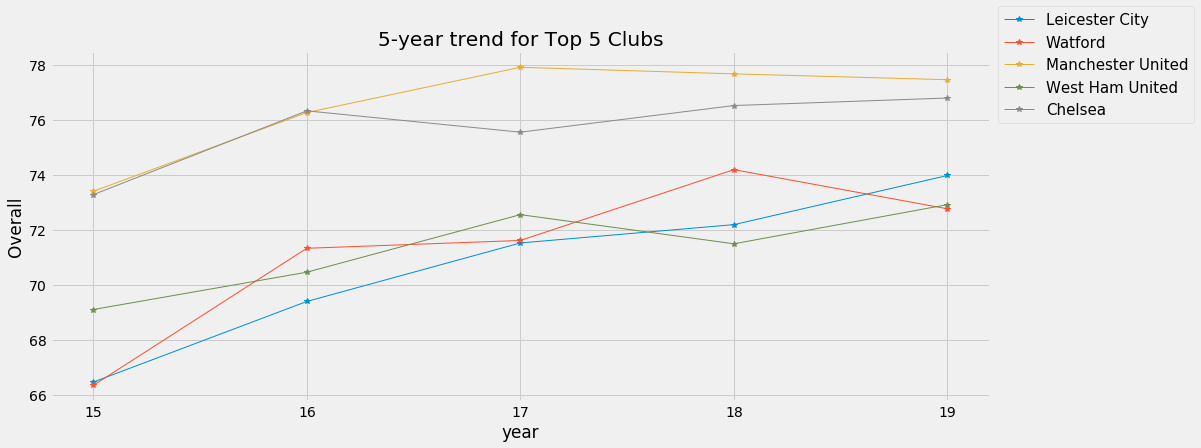

In [13]:
plt.figure(figsize=(15,6))
for i in range(0,5):
    plt.plot(list(merged_ov_df.iloc[i,1:-1].values), marker='*', linewidth=1, label=merged_ov_df.iloc[i,0])
plt.legend(fontsize=15, loc='upper left', bbox_to_anchor=(1, 1.15))
plt.xticks([0,1,2,3,4], labels=['15','16','17','18','19'])
plt.xlabel("year")
plt.ylabel("Overall")
plt.title("5-year trend for Top 5 Clubs")
plt.show()

**We can see why our scoring method is flawed here. Despite Arsenal having consistently good overall average it scored the least, while the highest score went to the club which had the maximum increase over the past 5 years. This doesn't neccessarily mean that the club isn't the best performed, or that it is. We need to find a scoring method that looks at how high their overall is for each year and also accesses if there has been an increase from year to year and not necessarily by how much there has been an increase.**

**But we still want to see if this scoring method changes the order if we only consider players who have been in the club for all the past 5 years and compute only their weighted average.**

# Scoring Method-2 Average Increase (Consistent Players)

In [14]:
def cal_sum(team1, team2):
    #computing the sum of all the players who are in all 5 years for a given club
    team_1_2 = team1[team1['sofifa_id'].isin(team2['sofifa_id'])]['overall']

    team_2_1 = team2[team2['sofifa_id'].isin(team1['sofifa_id'])]['overall']

    return len(team_1_2), (team_2_1.sum() - team_1_2.sum())

In [15]:
def calculate(clubs):
    #For players consistent in all 5 years
    score = {}
    for club in clubs:
        team_15 = fifa_15[fifa_15['club'] == club]
        team_16 = fifa_16[fifa_16['club'] == club]
        team_17 = fifa_17[fifa_17['club'] == club]
        team_18 = fifa_18[fifa_18['club'] == club]
        team_19 = fifa_19[fifa_19['club'] == club]
        
        l1, score_15_16 = cal_sum(team_15, team_16)
        l2, score_16_17 = cal_sum(team_16, team_17)
        l3, score_17_18 = cal_sum(team_17, team_18)
        l4, score_18_19 = cal_sum(team_18, team_19)
        
        sum_ = (score_15_16 + score_16_17 + score_17_18 + score_18_19) / (l1+l2+l3+l4)
        score[club] = sum_
    return score

In [16]:
scores = calculate(clubs)

In [17]:
score_df = pd.DataFrame(data=scores.values(), index=scores.keys())
score_df.reset_index(inplace=True)

score_df.columns = ["club", 'score']

In [18]:
# Scaling the scores to fall between 0 and 100
score_df.score = ((score_df.score - score_df.score.min()) / (score_df.score.max() - score_df.score.min())) * 100
score_df.sort_values("score", ascending=False, inplace=True)

In [19]:
merged_df = new_df_drop.merge(score_df,on='club')
merged_df.sort_values("score", ascending=False, inplace=True)

Text(0, 0.5, 'Clubs')

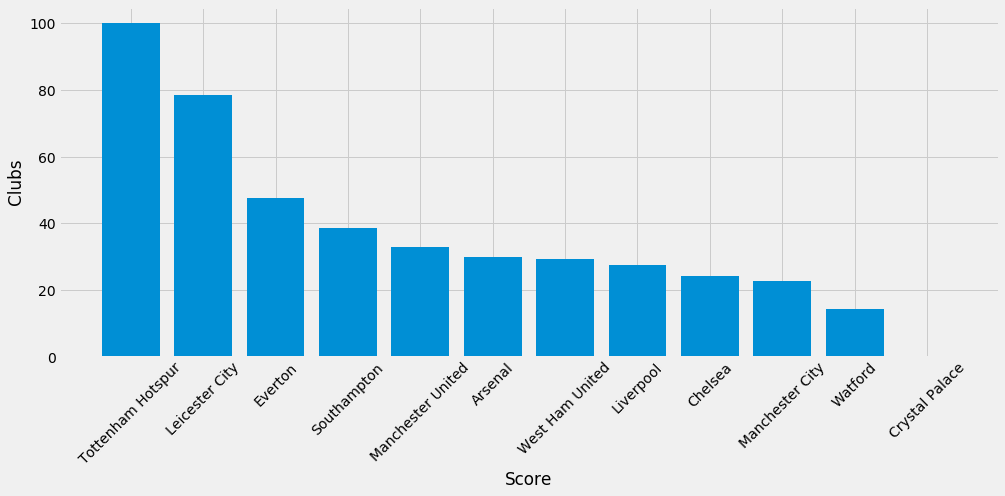

In [20]:
plt.figure(figsize=(15,6))
plt.bar(merged_df.club, merged_df.score)
plt.xticks(rotation=45)
plt.xlabel("Score")
plt.ylabel("Clubs")

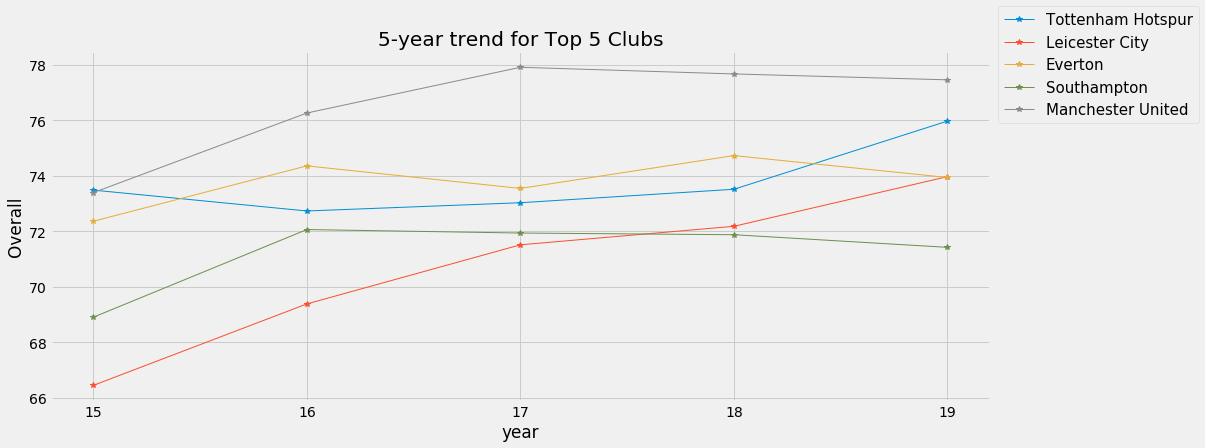

In [21]:
plt.figure(figsize=(15,6))
for i in range(0,5):
    plt.plot(list(merged_df.iloc[i,1:-1].values), marker='*', linewidth=1, label=merged_df.iloc[i,0])
plt.legend(fontsize=15, loc='upper left', bbox_to_anchor=(1, 1.15))
plt.xticks([0,1,2,3,4], labels=['15','16','17','18','19'])
plt.xlabel("year")
plt.ylabel("Overall")
plt.title("5-year trend for Top 5 Clubs")
plt.show()

**But owing to the inconsistencies in the previous scoring method in adequately measuring the average 'overall' increase in clubs, we resort to a ranking method, whereby the clubs are ranked from 1 to 12, with 1 being the best, for the average overall, for each year. Then the mean rank is computed from which we use proportionality to represent the scores from 1 - 12 to 100 - 8.33(100/12).**

# Scoring Method-3 (Based on Ranking)
We calculated the ranks of the clubs for each year using the average `overall` from each year. And then we calculated the average rank and assigned the scores to the clubs based on the average rank.

In [22]:
#Ranking each year and appending to dataframe
new = new_df_drop.sort_values('overall_15', ascending=False)
new['rank15']=np.arange(1,13)
new = new.sort_values('overall_16', ascending=False)
new['rank16']=np.arange(1,13)
new = new.sort_values('overall_17', ascending=False)
new['rank17']=np.arange(1,13)
new = new.sort_values('overall_18', ascending=False)
new['rank18']=np.arange(1,13)
new = new.sort_values('overall_19', ascending=False)
new['rank19']=np.arange(1,13)
new

,club,overall_15,overall_16,overall_17,overall_18,overall_19,rank15,rank16,rank17,rank18,rank19
8,Manchester United,73.393939,76.259259,77.906250,77.666667,77.454545,4,3,1,1,1
7,Manchester City,73.424242,77.206897,75.545455,74.121212,76.848485,3,1,3,7,2
2,Chelsea,73.272727,76.321429,75.545455,76.515152,76.787879,5,2,4,2,3
6,Liverpool,73.060606,76.111111,74.727273,75.909091,76.000000,6,4,5,3,4
15,Tottenham Hotspur,73.484848,72.733333,73.030303,73.515152,75.969697,2,8,7,8,5
0,Arsenal,74.181818,74.437500,76.151515,75.757576,74.787879,1,5,2,4,6
5,Leicester City,66.454545,69.387097,71.515152,72.181818,73.969697,11,12,11,9,7
4,Everton,72.363636,74.357143,73.545455,74.727273,73.939394,7,6,6,5,8
18,West Ham United,69.093750,70.451613,72.545455,71.484848,72.909091,9,11,8,11,9
16,Watford,66.333333,71.321429,71.606061,74.181818,72.757576,12,10,10,6,10


In [23]:
mean_list = []
for i in range(0,12):
    mean_rank = new.iloc[i,6:].values.astype(float).mean()
    mean_list.append(mean_rank)
new['mean_rank'] = mean_list

In [24]:
score1 = []
for i in range(0,12):
    scorea = (12 -new.iloc[i,-1])*100/12
    score1.append(scorea)
new['score1'] = score1
new

,club,overall_15,overall_16,overall_17,overall_18,overall_19,rank15,rank16,rank17,rank18,rank19,mean_rank,score1
8,Manchester United,73.393939,76.259259,77.906250,77.666667,77.454545,4,3,1,1,1,2.0,83.333333
7,Manchester City,73.424242,77.206897,75.545455,74.121212,76.848485,3,1,3,7,2,3.2,73.333333
2,Chelsea,73.272727,76.321429,75.545455,76.515152,76.787879,5,2,4,2,3,3.2,73.333333
6,Liverpool,73.060606,76.111111,74.727273,75.909091,76.000000,6,4,5,3,4,4.4,63.333333
15,Tottenham Hotspur,73.484848,72.733333,73.030303,73.515152,75.969697,2,8,7,8,5,6.0,50.000000
0,Arsenal,74.181818,74.437500,76.151515,75.757576,74.787879,1,5,2,4,6,3.6,70.000000
5,Leicester City,66.454545,69.387097,71.515152,72.181818,73.969697,11,12,11,9,7,10.0,16.666667
4,Everton,72.363636,74.357143,73.545455,74.727273,73.939394,7,6,6,5,8,6.4,46.666667
18,West Ham United,69.093750,70.451613,72.545455,71.484848,72.909091,9,11,8,11,9,9.6,20.000000
16,Watford,66.333333,71.321429,71.606061,74.181818,72.757576,12,10,10,6,10,9.6,20.000000


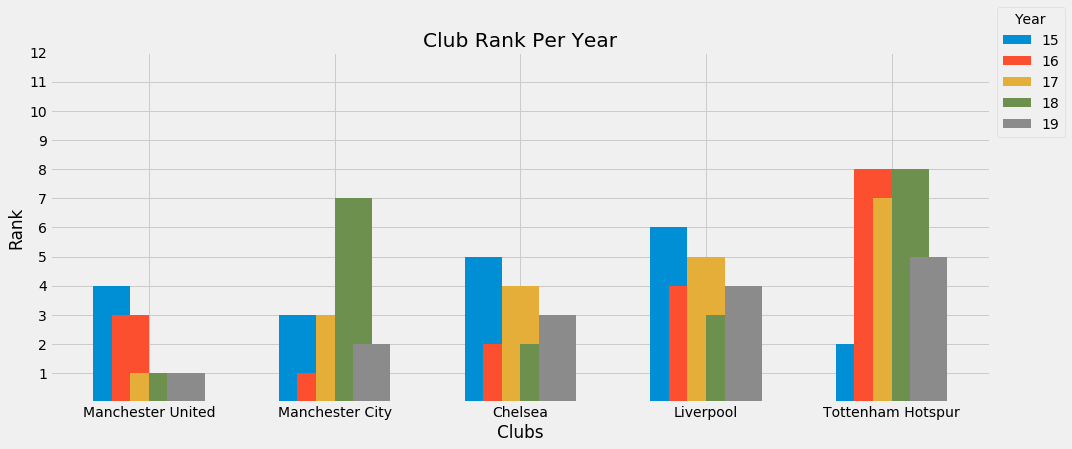

In [25]:
xticks = np.arange(5)
plt.figure(figsize=(15,6))
plt.bar(xticks, new.head(5)['rank15'], width=0.2, label='15')
plt.bar(xticks+0.1, new.head(5)['rank16'], width=0.2, label='16')
plt.bar(xticks+0.2, new.head(5)['rank17'], width=0.2, label='17')
plt.bar(xticks+0.3, new.head(5)['rank18'], width=0.2, label='18')
plt.bar(xticks+0.4, new.head(5)['rank19'], width=0.2, label='19')
plt.yticks(np.arange(1,13))
plt.xticks(xticks+0.2, labels=new.head()['club'])
plt.xlabel("Clubs")
plt.ylabel("Rank")
plt.title("Club Rank Per Year")
plt.legend(title="Year", loc='upper left', bbox_to_anchor=(1, 1.15))
plt.show()

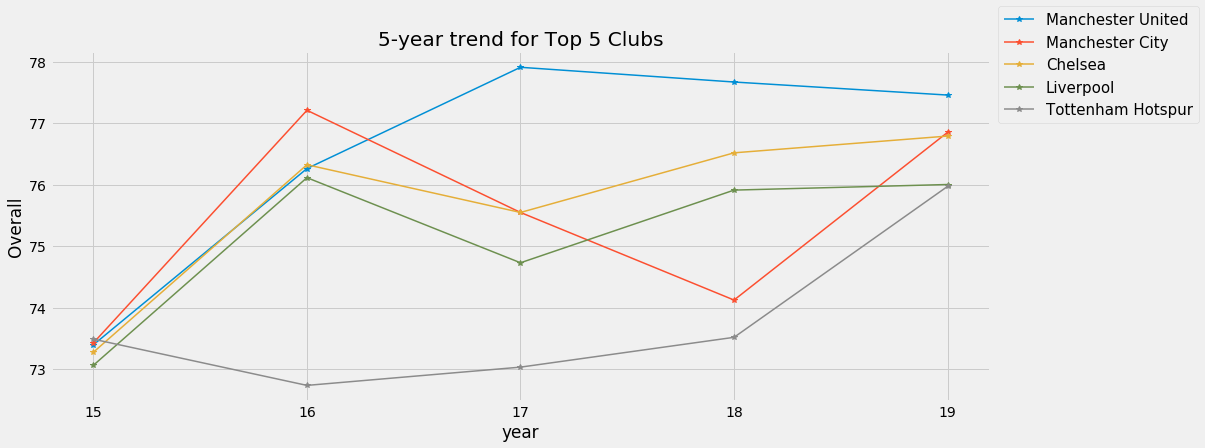

In [26]:
plt.figure(figsize=(15,6))
for i in range(0,5):
    plt.plot(list(new.iloc[i,1:6].values), marker='*', linewidth=1.5, label=new.iloc[i,0])
plt.legend(fontsize=15, loc='upper left', bbox_to_anchor=(1, 1.15))
plt.xticks([0,1,2,3,4], labels=['15','16','17','18','19'])
plt.xlabel("year")
plt.ylabel("Overall")
plt.title("5-year trend for Top 5 Clubs")
plt.show()

Text(0, 0.5, 'Clubs')

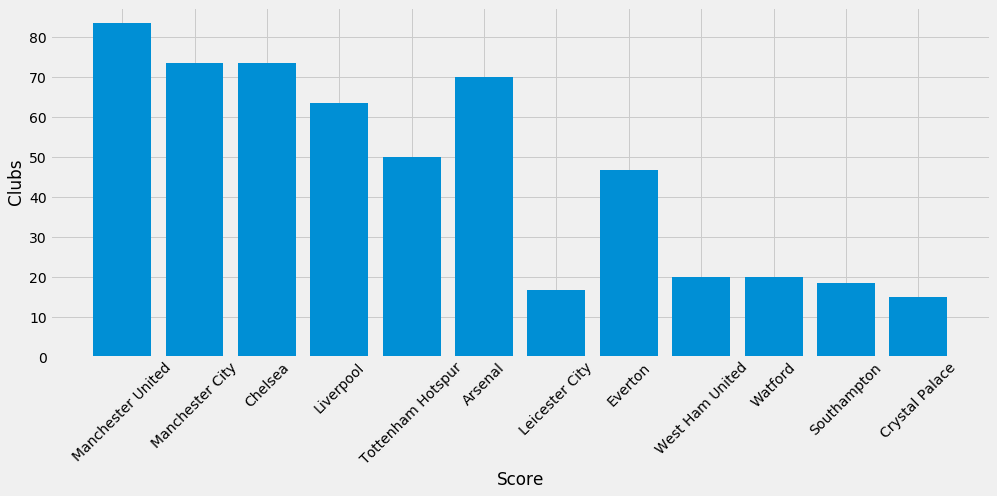

In [27]:
plt.figure(figsize=(15,6))
plt.bar(new.club, new.score1)
plt.xticks(rotation=45)
plt.xlabel("Score")
plt.ylabel("Clubs")

**We see a significant difference in the scores from both methods. While the ranking method is not perfect, and perhaps the inclusion of other predictors might have delievered a better score, the ranking method takes into account how consistent the clubs have been in mainintaing their "overall" average.**

# MSE 
**We compare scoring method 1, method 2 and another set of scores from Harshita's and Atharva's team and compare it with the scores we obtained for method 3..**

In [28]:
# this is the score that Harshita(from another group) shared with us
harshita_scores = {
    'Tottenham Hotspur': 2.931625703843884,
    'Leicester City': 14.491829494903971,
    'Everton': 1.1601282742347887,
    'Manchester United': 97.48895723747833,
    'Southampton': 1.422091768241594,
    'Arsenal': 10.19000678617647,
    'West Ham United': 8.725488568653235,
    'Liverpool': 1.5588594432045118,
    'Chelsea': 7.4841253147532365,
    'Manchester City': 12.856434014724837,
    'Watford': 3.451252278890241,
    'Crystal Palace': 25.573254209448624
}

# saving the scores as a dataframe
test_scores_df = pd.DataFrame(harshita_scores.values(), harshita_scores.keys())
test_scores_df.reset_index(inplace=True)
test_scores_df.drop('index', axis=1)
test_scores_df.columns = ['club', 'score']
test_scores_df

,club,score
0,Tottenham Hotspur,2.931626
1,Leicester City,14.491829
2,Everton,1.160128
3,Manchester United,97.488957
4,Southampton,1.422092
5,Arsenal,10.190007
6,West Ham United,8.725489
7,Liverpool,1.558859
8,Chelsea,7.484125
9,Manchester City,12.856434


In [29]:
# make a copy of dataframe
test_df = new.copy()
test_df = test_df.merge(test_scores_df, on='club', how='outer')

### Merge all the scores with respect to clubs and calculate the MSE

In [30]:
# get the score from method-1
score_1_df = merged_ov_df[['club', 'score']]
score_1_df.columns = ['club', 'm1_score']

# get the score from method-3
score_2_df = merged_df[['club', 'score']]
score_2_df.columns = ['club', 'm2_score']

# get the score from method-3 and other (harshita's score)
score_3_df = test_df[['club', 'score1', 'score']]
score_3_df.columns = ['club', 'm3_score', 'other_score']

# merge all above dataframe into one
final_score_df = score_1_df.merge(score_2_df, on='club')
final_score_df = final_score_df.merge(score_3_df, on='club')

# load new model score
new_score = pd.read_csv('data/staff_scores.csv')
# removed the unnecessary column
new_score.drop('Unnamed: 0', axis=1, inplace=True)
# rename the columns to make it mergeable
new_score.columns = ['club', 'other_score_1']
# merge with our final_score_df
final_score_df1 = final_score_df.merge(new_score, on='club')
# calculate the average from all the scores excluding m3_score (our final score)
final_score_df1['avg_score'] = (final_score_df1['m1_score'] + final_score_df1['m2_score'] + final_score_df1['other_score'] + final_score_df1['other_score_1']) / 4

In [31]:
# m1_score: calculated using method-1
# m2_score: calculated using method-2
# m3_score: calculated using method-3
# other_score: score shared by Harshita
# other_score_1: score shared by Atharva
# avg_score: average of m1_score, m2_score, other_score and other_score_1
final_score_df1

,club,m1_score,m2_score,m3_score,other_score,other_score_1,avg_score
0,Leicester City,100.000000,78.530664,16.666667,14.491829,100.000000,73.255623
1,Watford,84.210526,14.314919,20.000000,3.451252,86.507586,47.121071
2,Manchester United,50.000000,32.908325,83.333333,97.488957,40.439814,55.209274
3,West Ham United,46.450110,29.286023,20.000000,8.725489,18.669611,25.782808
4,Chelsea,42.105263,24.341639,73.333333,7.484125,74.732039,37.165767
5,Manchester City,40.789474,22.710390,73.333333,12.856434,24.872632,25.307232
6,Liverpool,33.771930,27.429776,63.333333,1.558859,60.670714,30.857820
7,Southampton,27.631579,38.549989,18.333333,1.422092,65.275599,33.219815
8,Tottenham Hotspur,27.192982,100.000000,50.000000,2.931626,36.232123,41.589183
9,Crystal Palace,15.789474,0.000000,15.000000,25.573254,4.456090,11.454705


In [32]:
# calculate mean squared error using the 
mse = mean_squared_error(final_score_df1.avg_score, final_score_df1.m3_score)
# print the mse
print("Final MSE: {:.2f}".format(mse))

Final MSE: 1094.91


**One can argue that the high MSE can be due to obviously the very different scoring methods and most importantly the different scaling used to bring the scores to 100. The high MSE can also be due to sparse availability of models to compare with. Further speculations about the MSE cannot be made without standardising the scaling and learning about the other team's scoring methods.**